In [42]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import operator
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
nations = ['Italy','England','France','Spain','European_Championship','World_Cup']

events = {}
events['England'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_England.json')
events['Italy'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_Italy.json')
events['France'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_France.json')
events['Spain'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_Spain.json')
events['European_Championship'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_European_Championship.json')
events['World_Cup'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_World_Cup.json')

In [3]:
Englandshots = events['England']['eventName'] == 'Shot'
shots = events['England'][Englandshots]

nationsnoEng = ['Italy','France','Spain','European_Championship','World_Cup']

for nation in nationsnoEng:
  shotsbool = events[nation]['eventName'] == 'Shot'
  onlyshots = events[nation][shotsbool]
  shots = pd.concat([shots, onlyshots])

In [4]:
shots['x'] = [x[0]['x'] for x in shots['positions']]
shots['y'] = [x[0]['y'] for x in shots['positions']]

In [5]:
shots["distance"] = np.sqrt(np.power(shots["x"] - 100, 2) + np.power(shots["y"] - 50, 2))

In [6]:
tagvalscol = []
for x in shots['tags']:
    tagvals = []
    for i in range(len(x)):
        tagvals.append(x[i]['id'])
    tagvalscol.append(tagvals)
shots['tagvals'] = tagvalscol

In [7]:
shots['goal'] = [1 if 101 in x else 0 for x in shots['tagvals']]

array([[<AxesSubplot:title={'center':'goal'}>]], dtype=object)

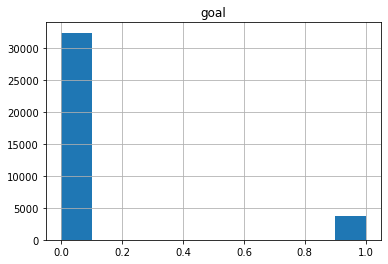

In [8]:
shots.hist('goal')

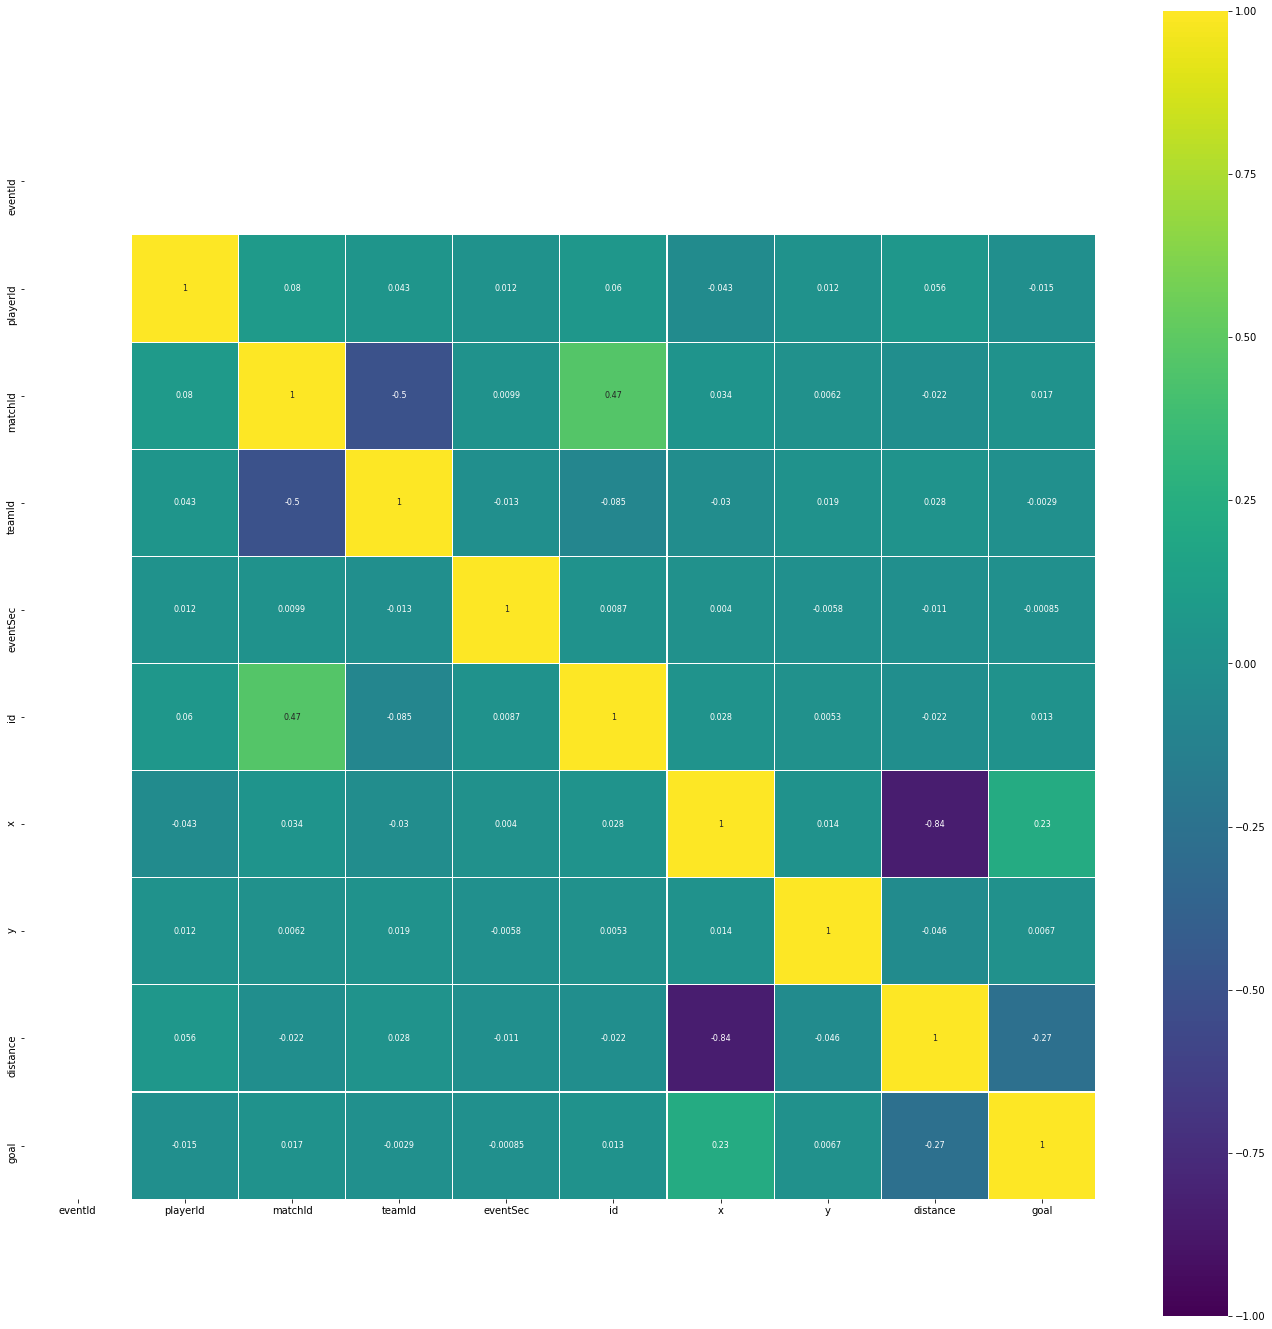

In [9]:
df_corr = shots.corr()
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [10]:
shots['foot_shot'] = ['right' if 402 in x else 'left' if 401 in x else 'head/body' for x in shots['tagvals']]

In [11]:
players = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/players.json')

In [12]:
playersprac = players[['firstName', 'lastName', 'height', 'weight', 'shortName', 'foot', 'wyId']]
shots = pd.merge(shots, playersprac, left_on = 'playerId', right_on = 'wyId')
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,tagvals,goal,foot_shot,firstName,lastName,height,weight,shortName,foot,wyId
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,...,"[101, 402, 201, 1205, 1801]",1,right,Alexandre,Lacazette,175,73,A. Lacazette,right,25413
1,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",25413,"[{'y': 48, 'x': 87}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2813.844402,...,"[402, 2101, 1802]",0,right,Alexandre,Lacazette,175,73,A. Lacazette,right,25413
2,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1207}, {'id'...",25413,"[{'y': 34, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,2H,2354.807116,...,"[401, 201, 1207, 1801]",0,left,Alexandre,Lacazette,175,73,A. Lacazette,right,25413
3,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",25413,"[{'y': 33, 'x': 90}, {'y': 100, 'x': 100}]",2499743,Shot,1609,2H,1404.650587,...,"[402, 201, 1212, 1802]",0,right,Alexandre,Lacazette,175,73,A. Lacazette,right,25413
4,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 58, 'x': 82}, {'y': 0, 'x': 0}]",2499749,Shot,1609,1H,1616.714627,...,"[101, 402, 201, 1206, 1801]",1,right,Alexandre,Lacazette,175,73,A. Lacazette,right,25413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",209091,"[{'y': 41, 'x': 80}, {'y': 100, 'x': 100}]",2058010,Shot,4418,2H,1637.488113,...,"[402, 201, 1216, 1802]",0,right,Corentin,Tolisso,181,78,C. Tolisso,right,209091
36173,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1202}, {'id'...",209091,"[{'y': 35, 'x': 87}, {'y': 0, 'x': 0}]",2058014,Shot,4418,2H,3016.680937,...,"[401, 201, 1202, 1801]",0,left,Corentin,Tolisso,181,78,C. Tolisso,right,209091
36174,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1215}, {'id'...",101953,"[{'y': 57, 'x': 92}, {'y': 0, 'x': 0}]",2058012,Shot,14358,2H,1590.119521,...,"[403, 201, 1215, 1802]",0,head/body,Aleksandr,Erokhin,195,79,A. Erokhin,right,101953
36175,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1213}, {'id'...",101953,"[{'y': 39, 'x': 94}, {'y': 0, 'x': 0}]",2058012,Shot,14358,E1,844.590203,...,"[403, 201, 1213, 1802]",0,head/body,Aleksandr,Erokhin,195,79,A. Erokhin,right,101953


In [47]:
#1 means the player shot with their strong foot, 0 means they shot with their weak foot or
#with their head/body
strong_foot = []
header = []
for idx, row in shots.iterrows():
    if row['foot_shot'] == row['foot']:
        strong_foot.append(1)
    else:
        strong_foot.append(0)
    if row['foot_shot'] == 'head/body':
        header.append(1)
    else:
        header.append(0)

In [48]:
shots['strong_foot'] = strong_foot
shots['header'] = header

In [22]:
#Add 45*60 seconds to every event in the second half, as eventSec tracks the number of seconds since
#the start of the current half
eventTime = []
for idx, row in shots.iterrows():
    if row['matchPeriod'] == '2H':
        eventTime.append(row['eventSec'] + (45*60))
    else:
        eventTime.append(row['eventSec'])

In [23]:
shots['eventTime'] = eventTime

In [38]:
#add a column for the shot angle
angles = []
for idx, row in shots.iterrows():
    #If shooting from touchline, angle will be zero
    #continue to avoid divide by zero errors
    if row['x'] == 100:
        angles.append(0)
        continue
    #moving everything to left side of the field to make calculation easier
    if row['y'] > 50:
        mirror = 100 - row['y']
    else:
        mirror = row['y']
    dist_a = ((row['x'] - 100)**(2))**(1/2)
    dist_b = ((mirror - 53.6)**2)**(1/2)
    dist_c = ((mirror - 46.4)**2)**(1/2)
    theta = np.arctan(dist_b/dist_a)*(180/math.pi)
    phi = np.arctan(dist_c/dist_a)*(180/math.pi)
    #Different cases for between the goalposts vs. to the left of a goalpost
    if mirror < 46.4:
        angles.append(theta - phi)
    else:
        angles.append(theta + phi)
shots['angle'] = angles

In [57]:
y = shots['goal']
X = shots[['eventTime', 'distance', 'angle','strong_foot', 'header']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
xGmodel = LogisticRegression(random_state=0).fit(X_train, y_train)

In [68]:
print(xGmodel.coef_)

[[ 3.71916946e-05 -1.37231426e-01  1.21317121e-02  1.40535044e-01
  -9.31093278e-01]]


In [81]:
y_pred_train = xGmodel.predict(X_train)
y_pred_test = xGmodel.predict(X_test)

In [69]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(xGmodel.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(xGmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.90
Accuracy of logistic regression classifier on test set: 0.89


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[8032   52]
 [ 898   63]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8084
           1       0.55      0.07      0.12       961

    accuracy                           0.89      9045
   macro avg       0.72      0.53      0.53      9045
weighted avg       0.86      0.89      0.86      9045



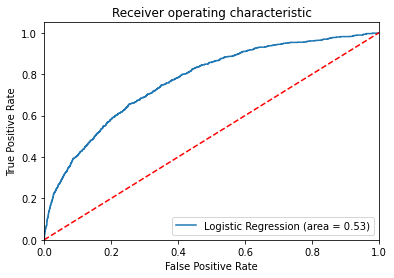

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xGmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xGmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()